## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [ ]:
# Your code here - remember to use markdown cells for comments as well!

Stakeholder: Real Estate Investment Firm interested in buying houses, improving them, and selling them.
Target: price

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from scipy import stats as stats
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
import statsmodels.api as sm

In [4]:
df = pd.read_csv('data/kc_house_data.csv')

In [10]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'address', 'lat', 'long'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [5]:
df['nuisance'].value_counts()

NO     24893
YES     5262
Name: nuisance, dtype: int64

In [10]:
for i in df.columns:
    print(i, "\n", df[i].value_counts(), "\n")

id 
 1233100736    2
2026059180    1
1423089049    1
3892500020    1
7321900035    1
             ..
1946000070    1
1250201175    1
5422570190    1
691000015     1
9430110210    1
Name: id, Length: 30154, dtype: int64 

date 
 7/1/2021      196
8/2/2021      186
6/23/2021     176
7/6/2021      176
6/16/2021     174
             ... 
6/9/2022        1
12/26/2021      1
12/5/2021       1
1/16/2022       1
12/25/2021      1
Name: date, Length: 365, dtype: int64 

price 
 650000.0     346
750000.0     307
800000.0     299
850000.0     296
600000.0     295
            ... 
838355.0       1
903888.0       1
576200.0       1
1081500.0      1
720902.0       1
Name: price, Length: 5202, dtype: int64 

bedrooms 
 3     12754
4      9597
2      3936
5      2798
6       498
1       391
7        80
0        44
8        38
9        14
10        3
13        1
11        1
Name: bedrooms, dtype: int64 

bathrooms 
 2.5     8475
2.0     7349
1.0     4576
3.0     4117
3.5     2266
1.5     1808
4.0      

In [50]:
df.corr()['price']

id              -0.034184
price            1.000000
bedrooms         0.289204
bathrooms        0.480401
sqft_living      0.608521
sqft_lot         0.085730
floors           0.180576
sqft_above       0.538651
sqft_basement    0.245058
sqft_garage      0.264169
sqft_patio       0.313409
yr_built         0.096013
yr_renovated     0.084786
lat              0.063632
long            -0.022509
Name: price, dtype: float64

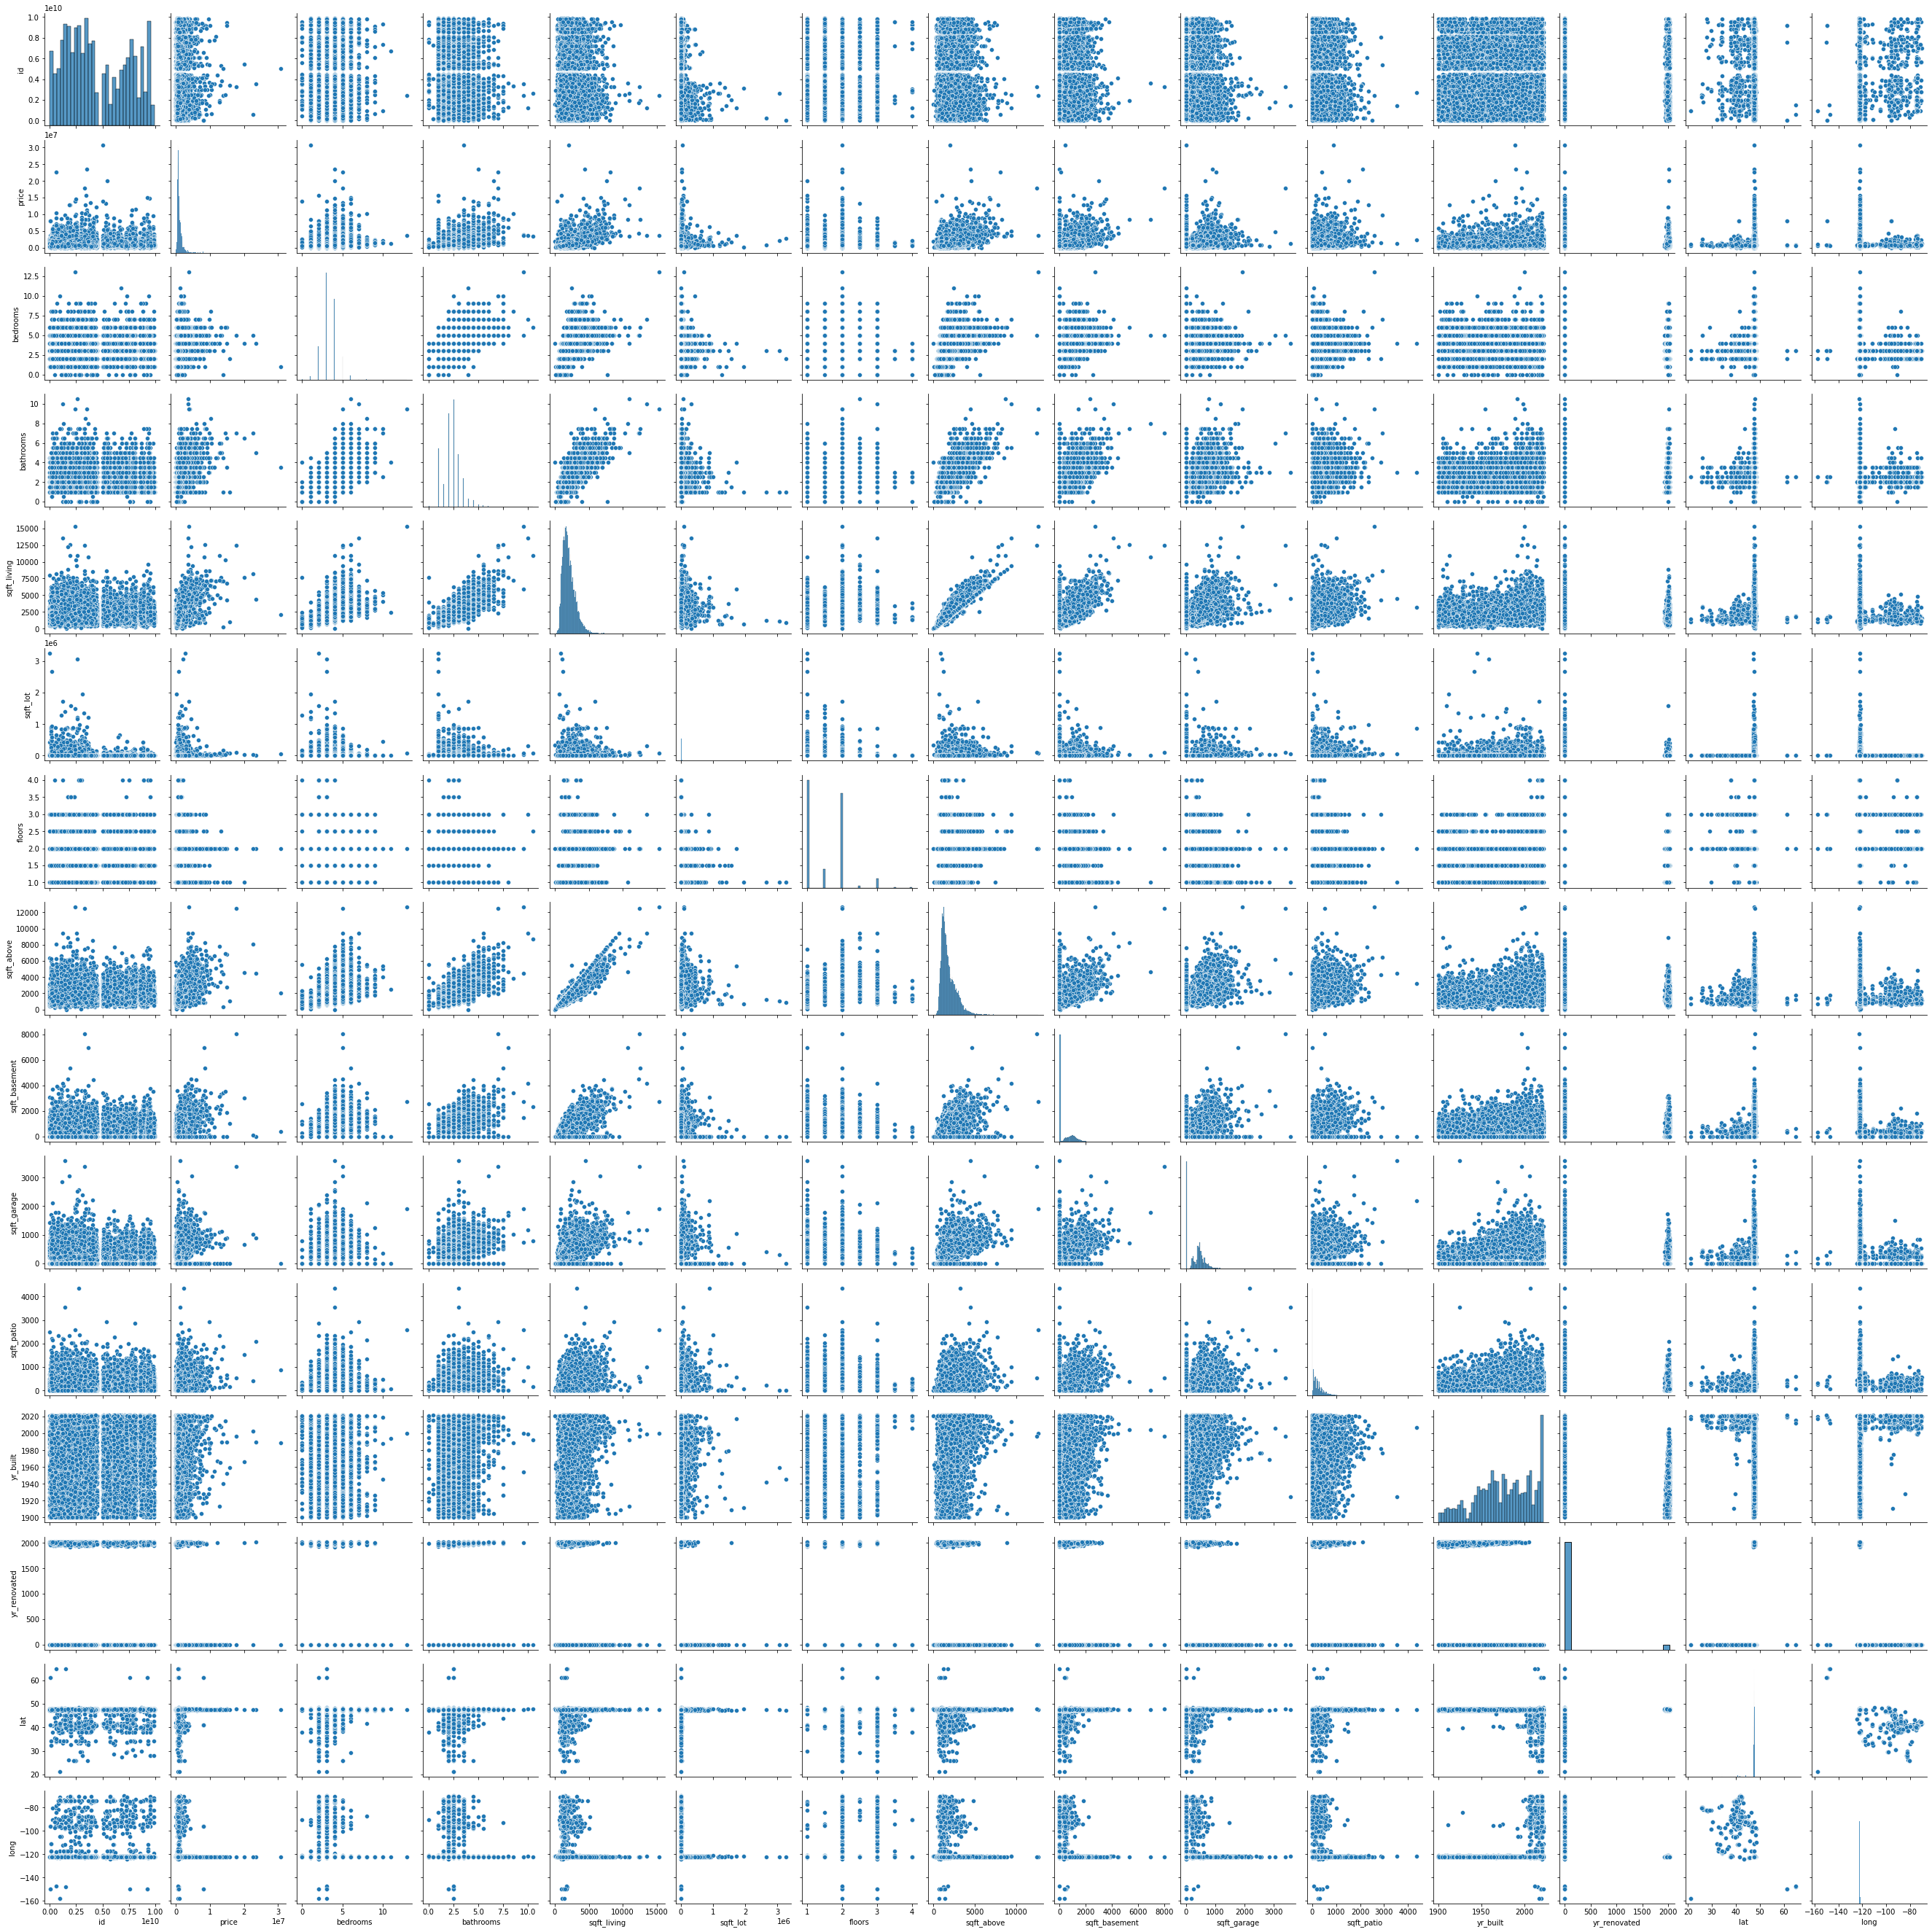

In [52]:
sns.pairplot(df)

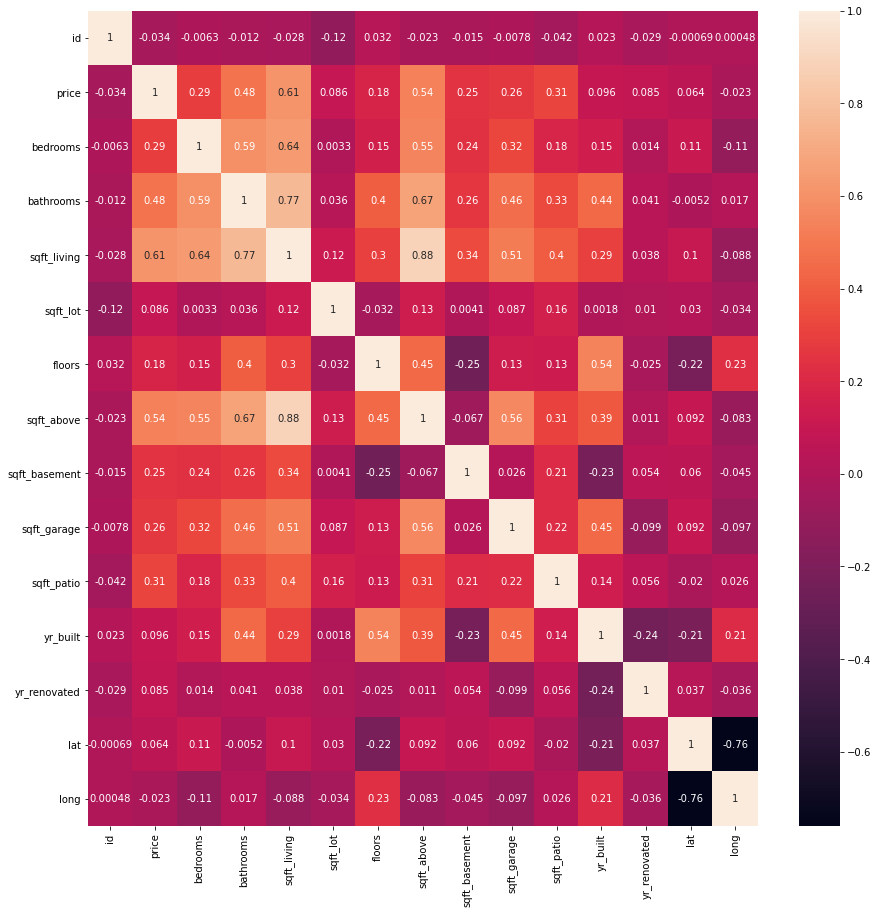

In [42]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(), annot = True);

In [68]:
target = df['price']    
preds_numbers_use = ['sqft_living','sqft_lot', 'sqft_garage','sqft_patio']
preds_categories_use = []

# categories to ignore for now
dont_use = ['id', 'date','sqft_above','yr_renovated', 'address', 'lat', 'long',
                  'sqft_basement']
preds_categories_dont_use = ['yr_built', 'condition', 'bathrooms', 'waterfront', 'floors',\
                        'bedrooms','view','grade','nuisance', 'sewer_system']

In [66]:
target + preds_numbers_use

['price', 'sqft_living', 'sqft_lot', 'sqft_garage', 'sqft_patio']

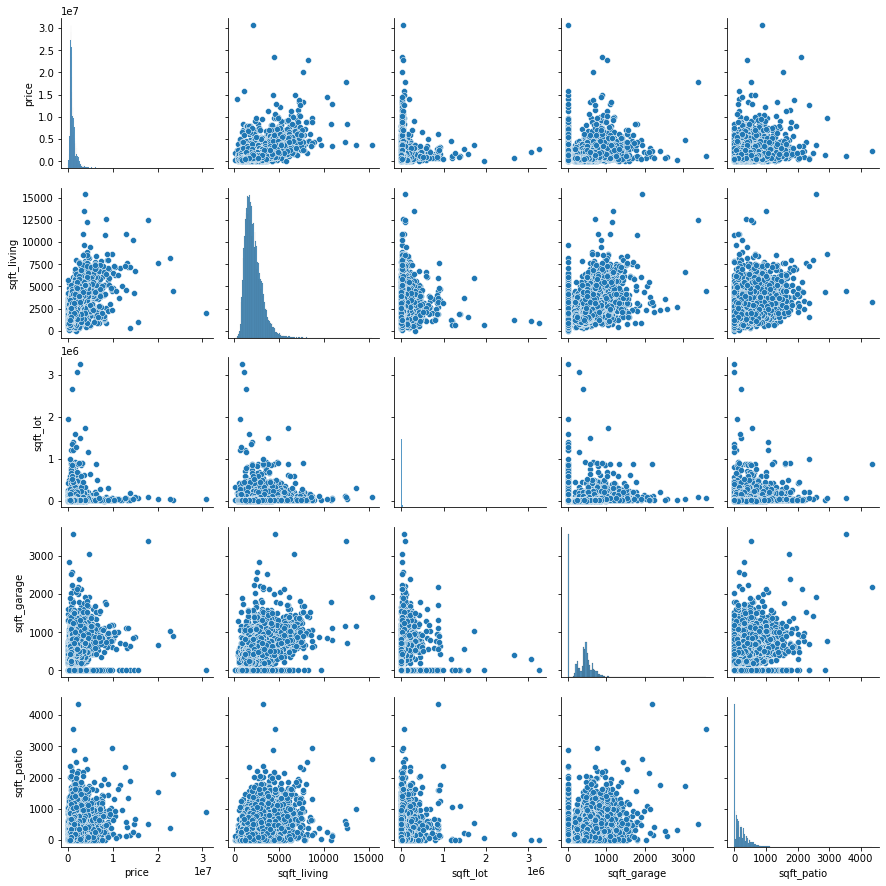

In [70]:
sns.pairplot(df[target + preds_numbers_use])

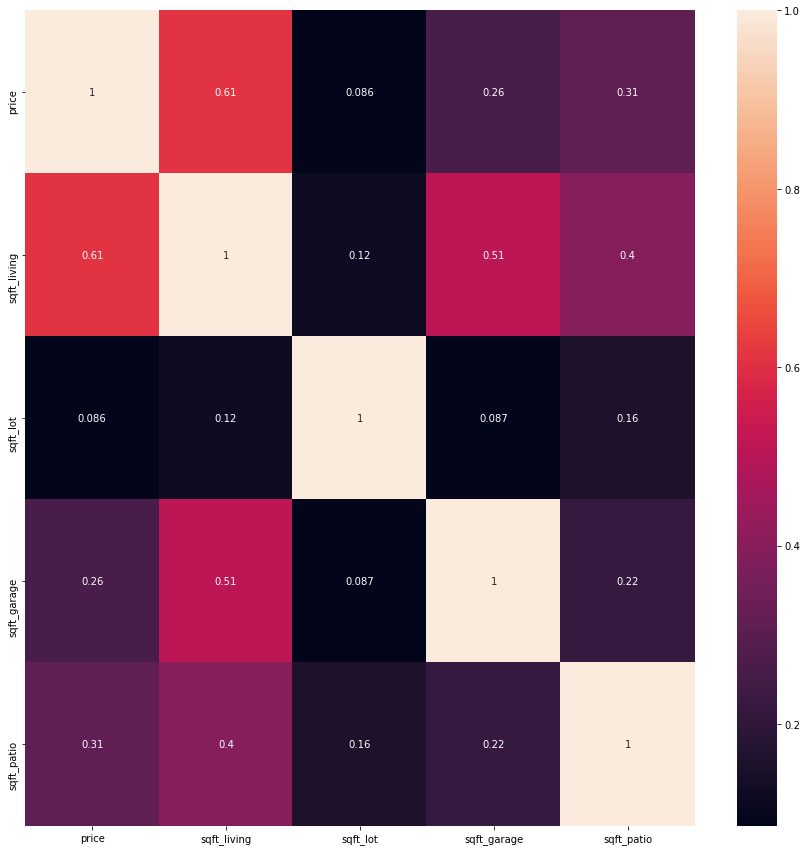

In [64]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df[target + preds_numbers_use].corr(), annot = True);

In [63]:
y = df[target]
x = df[preds_numbers_use + preds_categories_use]
model = sm.OLS(y, sm.add_constant(x)).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     4614.
Date:                Tue, 06 Dec 2022   Prob (F-statistic):               0.00
Time:                        15:44:45   Log-Likelihood:            -4.4889e+05
No. Observations:               30155   AIC:                         8.978e+05
Df Residuals:                   30150   BIC:                         8.978e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.394e+04   9712.988     -7.613      0.000    -9.3e+04   -5.49e+04
sqft_living   558.9498      5.171    108.087      0.000     548.814     569.086
sqft_lot        0.0810      0.068      1.185      0.236      -0.053       0.215
sqft_garage  -206.3546     16.569    -12.454      0.000    -238.831    -173.878
sqft_patio    315.1985     18.180     17.338      0.000     279.565     350.832
==============================================================================
Omnibus:                    43143.887   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         46061000.326
Skew:                           8.082   Prob(JB):                         0.00
Kurtosis:                     193.783   Cond. No.                     1.50e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.5e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""